In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits_ADE = np.load("./ResultsData/performance_digits_num_par_vs_alpha_SHORT.npy")
fashion_ADE = np.load("./ResultsData/performance_fashion_num_par_vs_alpha_SHORT22.npy")
digits_BC = np.load("./ResultsData/performance_digits_num_par_vs_alpha_ArB_ArC_20K.npy")
fashion_BC = np.load("./ResultsData/performance_fashion_num_par_vs_alpha_20K_ArB_ArC.npy")

In [3]:
print(digits_ADE.shape)
print(fashion_ADE.shape)
print(digits_BC.shape)
print(fashion_BC.shape)

(10, 9, 8, 4)
(10, 9, 8, 4)
(10, 6, 8, 4)
(10, 6, 8, 4)


In [4]:
digits = np.concatenate((digits_ADE, digits_BC), axis=1)
fashion = np.concatenate((fashion_ADE, fashion_BC), axis=1)

In [5]:
fashion.shape

(10, 15, 8, 4)

In [6]:
nodes_list1 = [[8, 8, 8], [32, 32, 32], [256, 256, 256]]
nodes_list2 = [[8, 16, 32], [32, 64, 128], [128, 256, 512]]
nodes_list3 = [[16, 8, 4], [64, 32, 16], [512, 256, 128]]
nodes_list4 = [[16, 8, 16], [64, 32, 64], [512, 256, 512]]
nodes_list5 = [[8, 16, 8], [32, 64, 32], [256, 512, 256]]
arcs = nodes_list1 + nodes_list2 + nodes_list3 + nodes_list4 + nodes_list5

In [7]:
digits_mean = np.nanmean(digits, axis=0)
digits_err = np.nanstd(digits, axis=0)/np.sqrt(10)
fashion_mean = np.nanmean(fashion, axis=0)
fashion_err = np.nanstd(fashion, axis=0)/np.sqrt(10)

In [8]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 15})

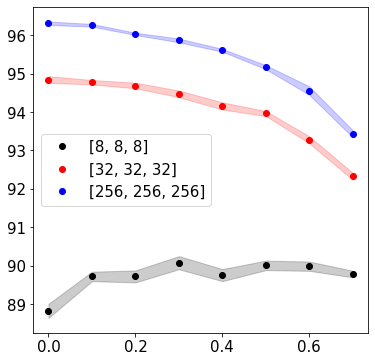

In [9]:
colors = ["k", "r", "b"]
x = np.linspace(0., 0.7, num=8)
for i in range(3):
    plt.plot(x, digits_mean[i,:,2], 'ko', label=str(nodes_list1[i]), color=colors[i])
    plt.fill_between(x, digits_mean[i,:,2] - digits_err[i,:,2], digits_mean[i,:,2] + digits_err[i,:,2], color=colors[i], alpha=0.2)
plt.legend();

In [10]:
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (17,8)
plt.rcParams.update({'font.size': 14})

/opt/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


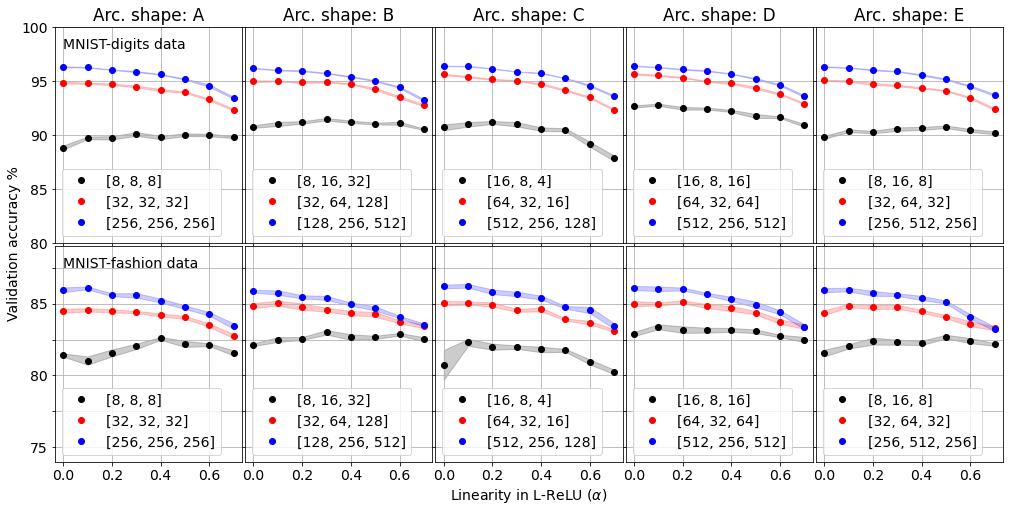

In [11]:
arc_names = ["Arc. shape: A", "Arc. shape: B", "Arc. shape: C", "Arc. shape: D", "Arc. shape: E"]
gs1 = gridspec.GridSpec(2, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4),
              (1,0),(1,1),(1,2),(1,3),(1,4)]
gs1.update(wspace=0.015, hspace=0.015)

for al in range(len(plot_index)):
    ax = plt.subplot(gs1[plot_index[al]])
    ax.grid()
    if al < 5:
        ax.set_title(arc_names[al])
        for i in range(3):
            i+=3*al
            ax.set_ylim([80, 100])
            plt.plot(x, digits_mean[i,:,2], 'ko', label=str(arcs[i]), color=colors[i-3*al])
            plt.fill_between(x, digits_mean[i,:,2] - digits_err[i,:,2], digits_mean[i,:,2] + digits_err[i,:,2], color=colors[i-3*al], alpha=0.2)
        ax.set_xticklabels([])
        if al%5 != 0:
            ax.set_yticklabels([])
        else:
            ax.text(0.0, 98, "MNIST-digits data")
            
        plt.legend()
    else:
        al = al-5
        for i in range(3):
            i+=3*al
            ax.set_ylim([74, 89])
            plt.plot(x, fashion_mean[i,:,2], 'ko', label=str(arcs[i]), color=colors[i-3*al])
            plt.fill_between(x, fashion_mean[i,:,2] - fashion_err[i,:,2], fashion_mean[i,:,2] + fashion_err[i,:,2], color=colors[i-3*al], alpha=0.2)
        if al%5 != 0:
            ax.set_yticklabels([])
        else:
            labels = [item.get_text() for item in ax.get_yticklabels()]
            labels = ["", "75", "", "80", "", "85", ""]
            ax.set_yticklabels(labels)
            ax.text(-0.23, 84, "Validation accuracy %", rotation=90)
            ax.text(0.0, 87.5, "MNIST-fashion data")
        if al == 2:
            ax.set_xlabel(r"Linearity in L-ReLU ($\alpha$)")
        plt.legend()
#plt.savefig("Corr_Fig_num_par_vs_alpha_DF_5ARC.png")
plt.show()


In [12]:
#for i in range(15):
    #print((np.argmax(digits_mean[i,:,2]))*0.1, arcs[i])

In [13]:
#for i in range(15):
    #print((np.argmax(fashion_mean[i,:,2]))*0.1, "\t\t",arcs[i])   